# Initial research questions

* comparative analysis of gender representation in artwork creation between born digital and analogue art collections
* with also, potentially, some details on medium, location…
* semantic analysis of the narrative about the artworks or what are the keywords associated with different artwork types

### The story could be:
The internet was supposed to revolutionize things, so how did it do when looking at who makes art and who gets included in collections?


 
In order to answer this question we need to go through the seven stages of information visualization, namely:

 * acquire
 * parse
 * filter
 * mine
 * represent
 * refine
 * interact 

A simple way to plan your work is:

 * choose the research question
 * map the question to pieces of information needed to answer the question (e.g. periods, countings)
 * map the data to specific data types (categorical, numerical, ordinal)
 * choose the plot(s) that better help you to visualise some pattern (e.g. a bar chart)
 * get your data in some form (SPARQL query results)
 * filter/ manipulate your data (select the variables that matter, make operations like countings) 
 * create a data structure that fits the plotting requirements (a table, a JSON etc) including the number of variables needed (e.g. one categorical and one numerical)


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
MOMAartists = pd.read_pickle('MOMA_data/MOMAartists.pkl')
MOMAartists


,ID,Artist,Nationality,Gender,Birth,Death,Wiki QID,ULAN
0,1,Robert Arneson,American,M,1930,1992,missing,0
1,2,Doroteo Arnaiz,Spanish,M,1936,0,missing,0
2,3,Bill Arnold,American,M,1941,0,missing,0
3,4,Charles Arnoldi,American,M,1946,0,Q1063584,500027998
4,5,Per Arnoldi,Danish,M,1941,0,missing,0
...,...,...,...,...,...,...,...,...
15217,133006,Andrew Chesnutt,American,M,1861,1934,missing,0
15218,133007,Lewis Chesnutt,American,M,1860,1933,missing,0
15219,133026,Alfred Tritschler,German,missing,1905,1970,missing,0
15220,133027,Studio of Dr. Paul Wolff & Tritschler,missing,missing,0,0,missing,0


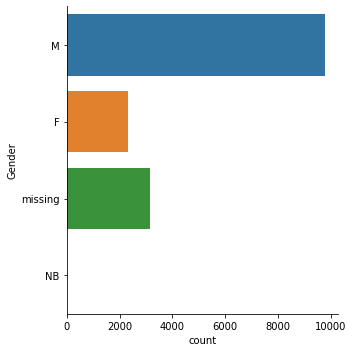

In [15]:
my_plot = sns.catplot(y="Gender", kind="count", data=MOMAartists)

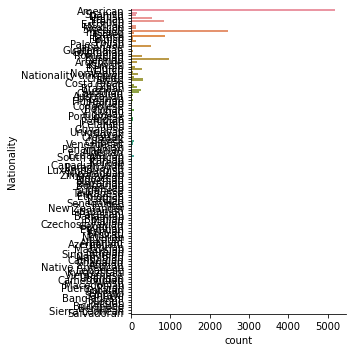

In [9]:
my_plot = sns.catplot(y="Nationality", kind="count", data=MOMAartists)

In [7]:
old_artworks = pd.read_pickle('./MoMA_data/pickle/old_artworks.pkl')


In [43]:
old = pd.read_pickle('./MoMA_data/pickle/old_artworks.pkl')
new = pd.read_pickle('./MoMA_data/pickle/new_artworks.pkl')
artists = pd.read_pickle('./MoMA_data/pickle/MoMAartists.pkl')

In [61]:
artists

,ID,Artist,Nationality,Gender,Birth,Death,Wiki QID,ULAN
0,1,Robert Arneson,American,M,1930,1992,missing,0
1,2,Doroteo Arnaiz,Spanish,M,1936,0,missing,0
2,3,Bill Arnold,American,M,1941,0,missing,0
3,4,Charles Arnoldi,American,M,1946,0,Q1063584,500027998
4,5,Per Arnoldi,Danish,M,1941,0,missing,0
...,...,...,...,...,...,...,...,...
15217,133006,Andrew Chesnutt,American,M,1861,1934,missing,0
15218,133007,Lewis Chesnutt,American,M,1860,1933,missing,0
15219,133026,Alfred Tritschler,German,missing,1905,1970,missing,0
15220,133027,Studio of Dr. Paul Wolff & Tritschler,missing,missing,0,0,missing,0


In [59]:
def get_gender(df, artists):
    #add also nationality 
    
    for index, i in df.iterrows():
        
        if ', 'in i['ID']:
            IDs = i['ID'].split(', ')
            genders = list()
            nationalities = list()
            for x in IDs:
                 gender = getattr(artists[artists['ID']== x], 'Gender')
                 gender = gender.values
                 gender = gender[0]
                 genders.append(gender)
                 nationality = getattr(artists[artists['ID']== x], 'Nationality')
                 nationality = nationality.values
                 nationality = nationality[0]
                 nationalities.append("".join(nationality))
            #print(nationalities)

        

            #     genders.append(str(gender))    
            
            df.at[index, 'Gender'] = ", ".join(genders)
            df.at[index, 'Nationality'] = ", ".join(nationalities)
            
        else:
            gender_s = getattr(artists[artists['ID'] == i['ID']], 'Gender')
            gender_s = gender_s.values

            #print(gender_s)
            nationality_s = getattr(artists[artists['ID'] == i['ID']], 'Nationality')
            nationality_s = nationality_s.values
            df.at[index, 'Gender'] = "".join(gender_s)
            df.at[index, 'Nationality'] = "".join(nationality_s)
        #print(i)
        
    return df

In [60]:
old['Nationality'] = "to do"
old['Gender'] = "to do"
vizOldincorrect = get_gender(old, artists)
vizOld = vizOldincorrect.replace([''], ['missing'], regex=True)

In [45]:
import pandas_profiling as pp
pp.ProfileReport(vizOld)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


In [75]:
new['Nationality'] = "to do"
new['Gender'] = "to do"
vizNewincorrect = get_gender(new, artists)


In [76]:
vizNew = vizOldincorrect.replace([''], ['missing'], regex=True)
vizNew

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1896,Ink and cut-and-pasted painted pages on paper,Architecture & Design,1996-04-09,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,Austrian,M
1,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture & Design,1997-01-15,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,Austrian,M
2,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture & Design,1997-01-15,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,Austrian,M
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photograph,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/7,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,missing,M
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photographs,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/8,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
100687,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007",1890,Gelatin silver print,Photography,2020-10-07,http://www.moma.org/collection/works/418928,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJd...,"missing, American, American","missing, M, M"
100688,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019-12-11,http://www.moma.org/collection/works/419286,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,Swiss,F
100689,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019-12-11,http://www.moma.org/collection/works/419287,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,Swiss,F
100690,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019-12-11,http://www.moma.org/collection/works/419288,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,Swiss,F


In [47]:
pp.ProfileReport(vizNew)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


In [73]:
artworks1 = pd.read_pickle("Rhizome_data/rhizome_artists.pkl", )


AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py'>